In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from obspy.core.trace import Trace, Stats
from obspy.core.stream import Stream
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from obspy.imaging.beachball import beachball
from obspy.imaging.beachball import beach
from obspy.imaging.source import plot_radiation_pattern

from matplotlib.gridspec import GridSpec

In [2]:
%matplotlib notebook

In [3]:
def alphabeach(df,axs3,c):
    misfit = df['Misfit']

    max_mis = misfit.max()
    min_mis = misfit.min()

    norm_ls = []
    for value in misfit:
        newval = (max_mis-value)/(max_mis-min_mis)
        norm_ls.append(newval)

    misfit_norm = df.assign(Normalized = norm_ls)
    
    n = 0
    for index,rows in misfit_norm.iterrows():
        f = [rows.Strike, rows.Dip, rows.Rake]
        
        h = 1.25
        w = 0.5

        if n <= 29:
            fault = beach(f, xy=(n+w,h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 59:
            fault = beach(f, xy=((n-30)+w,2*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 89:
            fault = beach(f, xy=((n-60)+w,3*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 119:
            fault = beach(f, xy=((n-90)+w,4*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 149:
            fault = beach(f, xy=((n-120)+w,5*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 179:
            fault = beach(f, xy=((n-150)+w,6*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 209:
            fault = beach(f, xy=((n-180)+w,7*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 239:
            fault = beach(f, xy=((n-210)+w,8*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 269:
            fault = beach(f, xy=((n-240)+w,9*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 299:
            fault = beach(f, xy=((n-270+w),10*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 329:
            fault = beach(f, xy=((n-300)+w,11*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 359:
            fault = beach(f, xy=((n-330)+w,12*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 389:
            fault = beach(f, xy=((n-360)+w,13*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 419:
            fault = beach(f, xy=((n-390)+w,14*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 449:
            fault = beach(f, xy=((n-420)+w,15*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 479:
            fault = beach(f, xy=((n-450)+w,16*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 509:
            fault = beach(f, xy=((n-480)+w,17*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 539:
            fault = beach(f, xy=((n-510)+w,18*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 569:
            fault = beach(f, xy=((n-540)+w,19*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        elif n <= 599:
            fault = beach(f, xy=((n-570)+w,20*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)
            
        elif n <= 629:
            fault = beach(f, xy=((n-600)+w,21*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)
    
        elif n <= 659:
            fault = beach(f, xy=((n-630)+w,22*h), facecolor = c,  alpha = rows.Normalized, width=1)
            axs3.add_collection(fault)

        n+=1

    return

In [4]:
def alpha_trial(data, axs1, axs2, axs3, alpha = 0.1):
    faults = data.loc[:,['Strike','Dip', 'Rake']]
    
    faults_ls = []
    
    for index, rows in faults.iterrows():
        my_list =[rows.Strike, rows.Dip, rows.Rake]
        faults_ls.append(my_list)
    
    n = 0
    for f in faults_ls:
        if n == 0:
            b = beach(f, xy = (0.5,0.5), width=1)
            axs1.add_collection(b)
        else: 
            b = beach(f, xy = (0.5,0.5), linewidth = 0, alpha=alpha, width=1)
            axs2.add_collection(b)
        n+=1
        
    return

In [5]:
def triplot(df,ymax):
    
    bymod = df.groupby(df.Mod)
    n_df = bymod.get_group('NewGudkova');c_df = bymod.get_group('Combined');t_df = bymod.get_group('TAYAK')     

    n = 0    
    for df in [n_df, c_df, t_df]:

        if n == 0:
            mod = 'New Gudkova'
        elif n == 1:
            mod = 'Combined'
        elif n == 2:
            mod = 'TAYAK'
           
        #### DEPTH 15 ####
        fig = plt.figure(figsize=(7,5),constrained_layout=True,frameon=False)

        gs = GridSpec(3,3, figure = fig)
        ax1 = fig.add_subplot(gs[0:1, 0:1])
        plt.axis('off')

        ax2 = fig.add_subplot(gs[2:3, 0:1])
        plt.axis('off')

        ax3 = fig.add_subplot(gs[0:, 1:])
        ax3.set_xlim(-0.5,31); ax3.set_ylim(0,ymax)
        plt.axis('off')

        grouped = df.groupby(df.Depth)
        df_15 = grouped.get_group(15)
        alpha_trial(df_15,ax1,ax2,ax3)
        alphabeach(df_15,ax3,'g')
        
        title = mod +'15'
        fig.suptitle(title)
        
        
        #### DEPTH 35 ####

        fig = plt.figure(figsize=(7,5),constrained_layout=True,frameon=False)

        gs = GridSpec(3,3, figure = fig)
        ax1 = fig.add_subplot(gs[0:1, 0:1])
        plt.axis('off')

        ax2 = fig.add_subplot(gs[2:3, 0:1])
        plt.axis('off')

        ax3 = fig.add_subplot(gs[0:, 1:])
        ax3.set_xlim(-0.5,31); ax3.set_ylim(0,ymax)
        plt.axis('off')
        
        df_35 = grouped.get_group(35)
        alpha_trial(df_35,ax1,ax2,ax3)
        alphabeach(df_35,ax3, 'b')
        
        title = mod +'35'
        fig.suptitle(title)

        
        #### DEPTH 55 ####
        
        fig = plt.figure(figsize=(7,5),constrained_layout=True,frameon=False)

        gs = GridSpec(3,3, figure = fig)
        ax1 = fig.add_subplot(gs[0:1, 0:1])
        plt.axis('off')

        ax2 = fig.add_subplot(gs[2:3, 0:1])
        plt.axis('off')

        ax3 = fig.add_subplot(gs[0:, 1:])
        ax3.set_xlim(-0.5,31); ax3.set_ylim(0,ymax)
        plt.axis('off')
        
        df_55 = grouped.get_group(55)
        alpha_trial(df_55,ax1,ax2,ax3)
        alphabeach(df_55,ax3, 'r')
        
        title = mod +'55'
        fig.suptitle(title)

        n+=1
    

    plt.show()
    return

In [6]:
df173a = pd.read_csv('/Users/maddysita/Desktop/CIERA_REU/event-by-event/S0173/csvs/ng173a_fullsyn.csv')

<IPython.core.display.Javascript object>


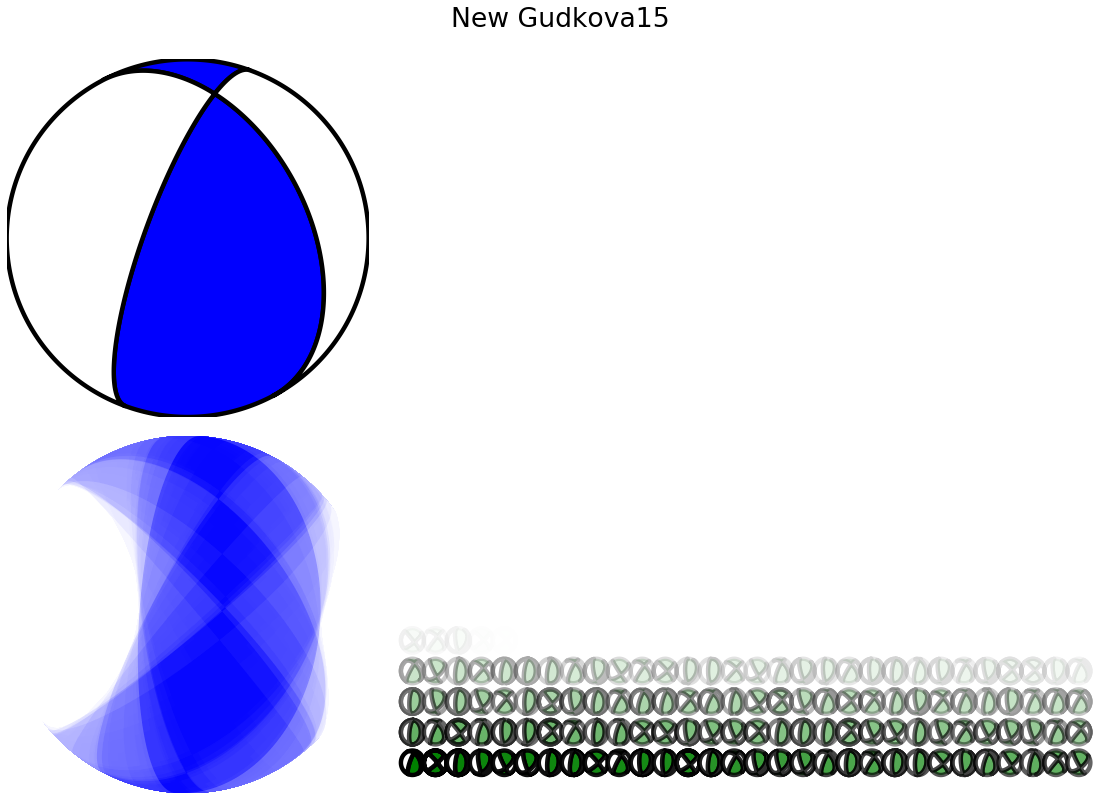

<IPython.core.display.Javascript object>


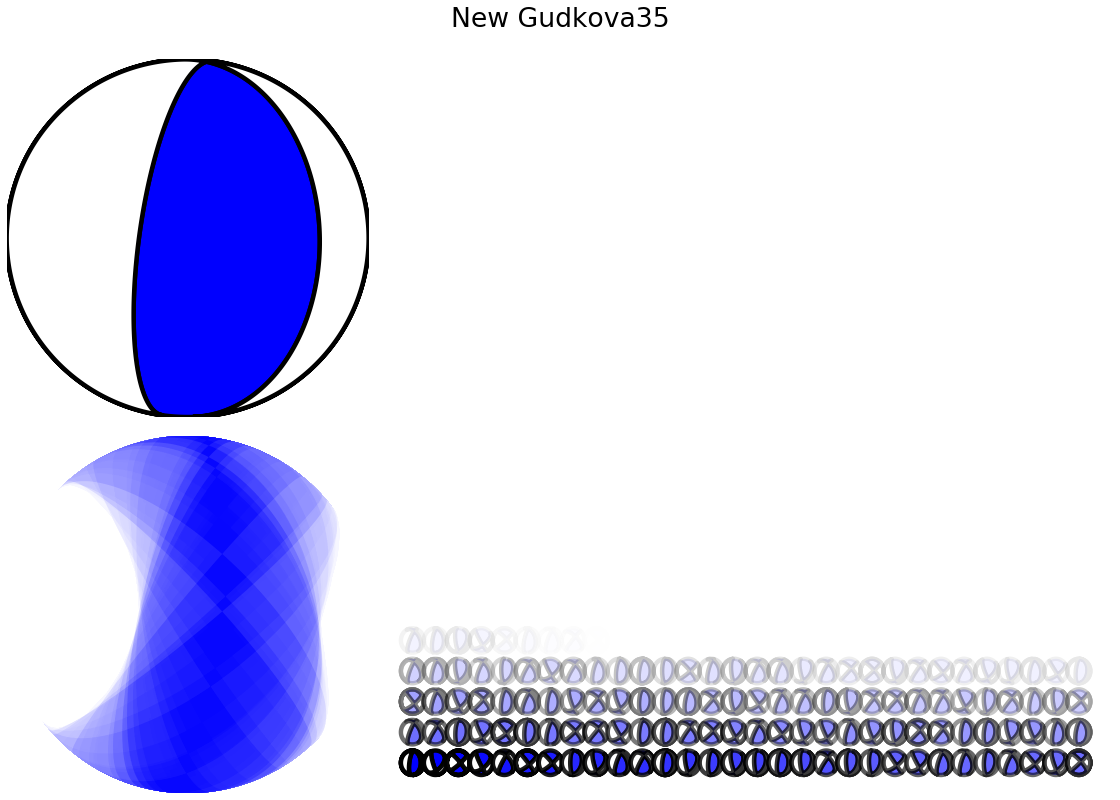

<IPython.core.display.Javascript object>


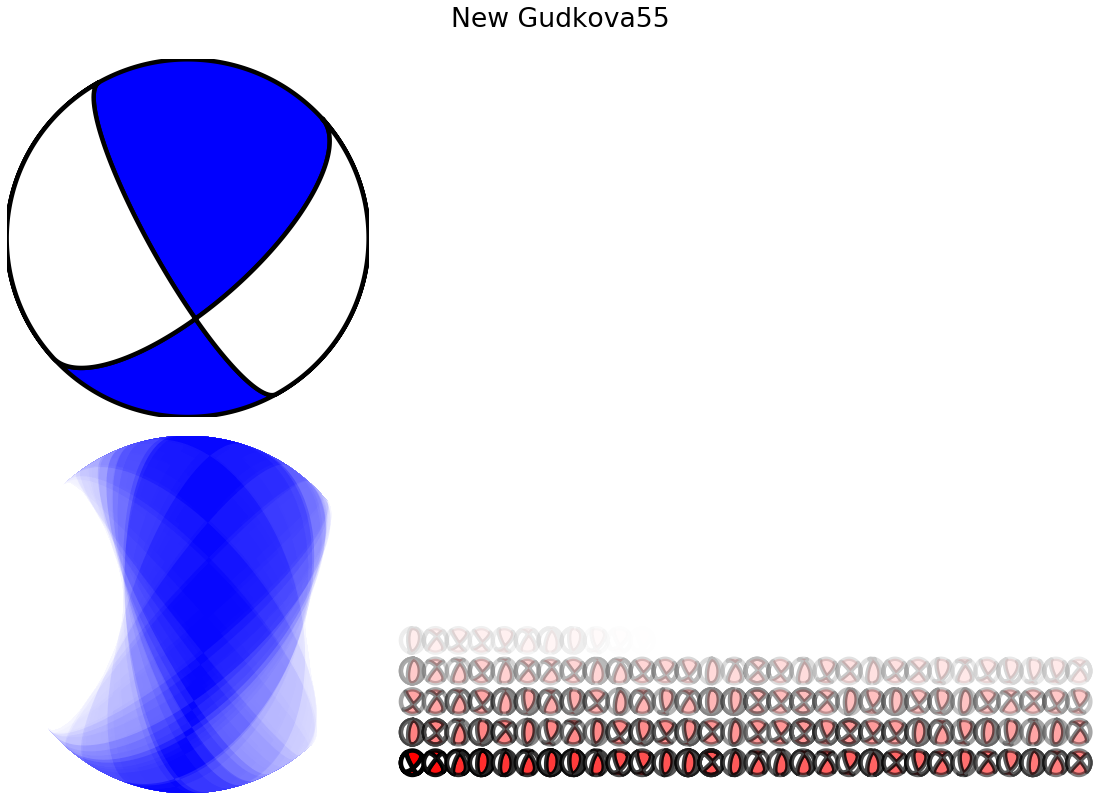

<IPython.core.display.Javascript object>


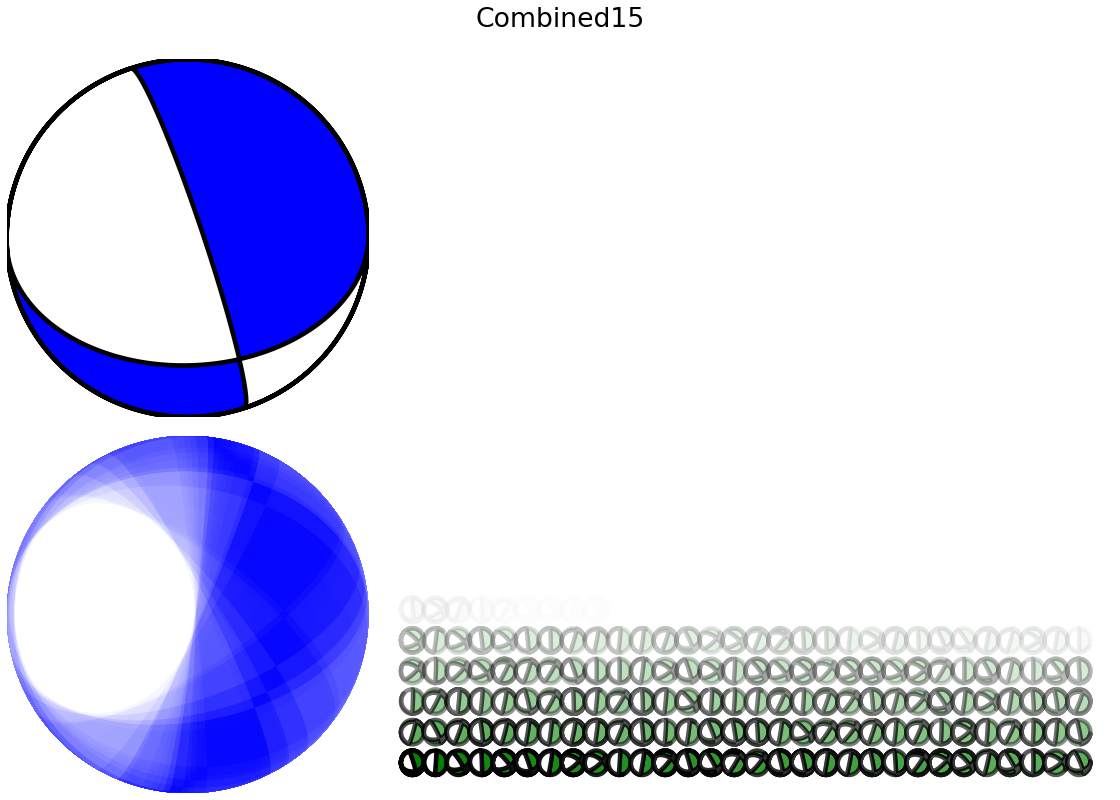

<IPython.core.display.Javascript object>


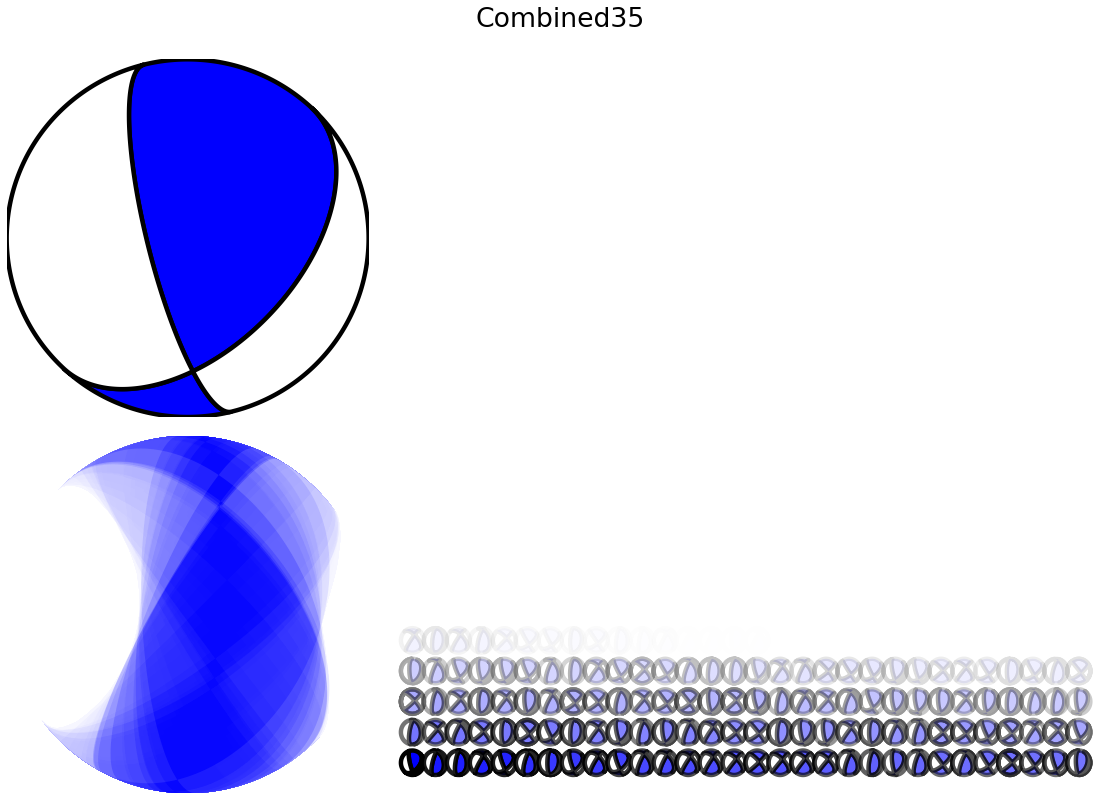

<IPython.core.display.Javascript object>


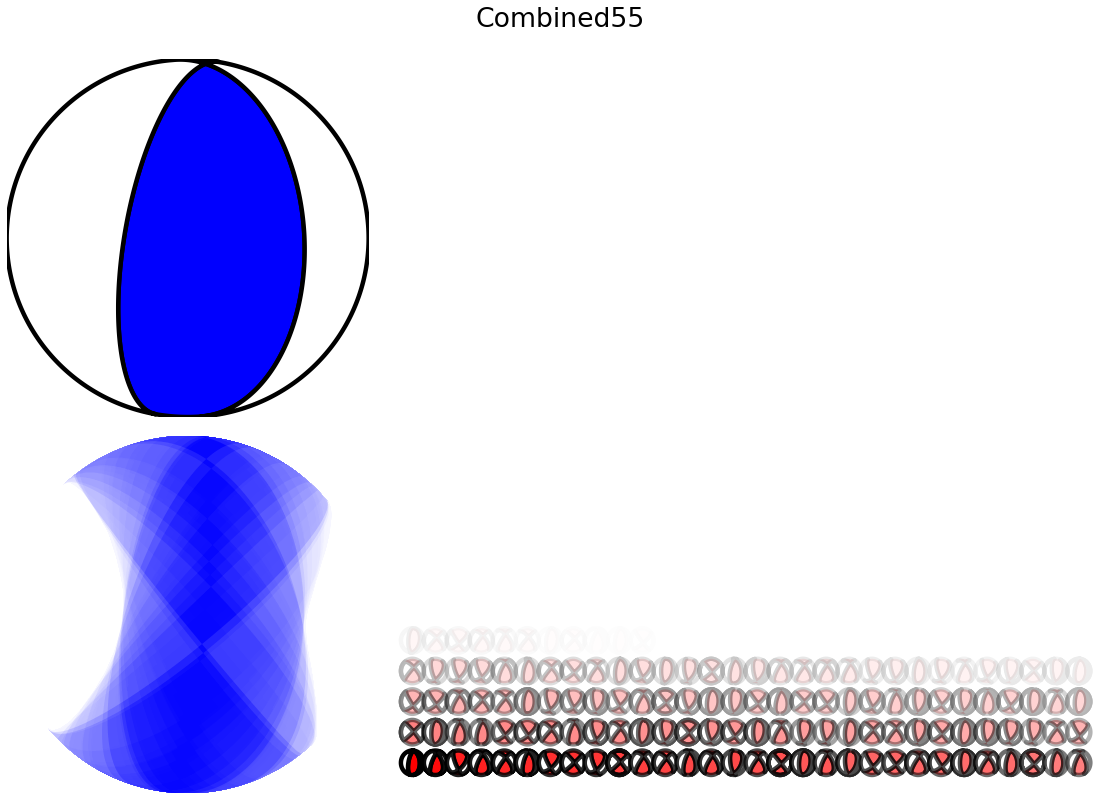

<IPython.core.display.Javascript object>


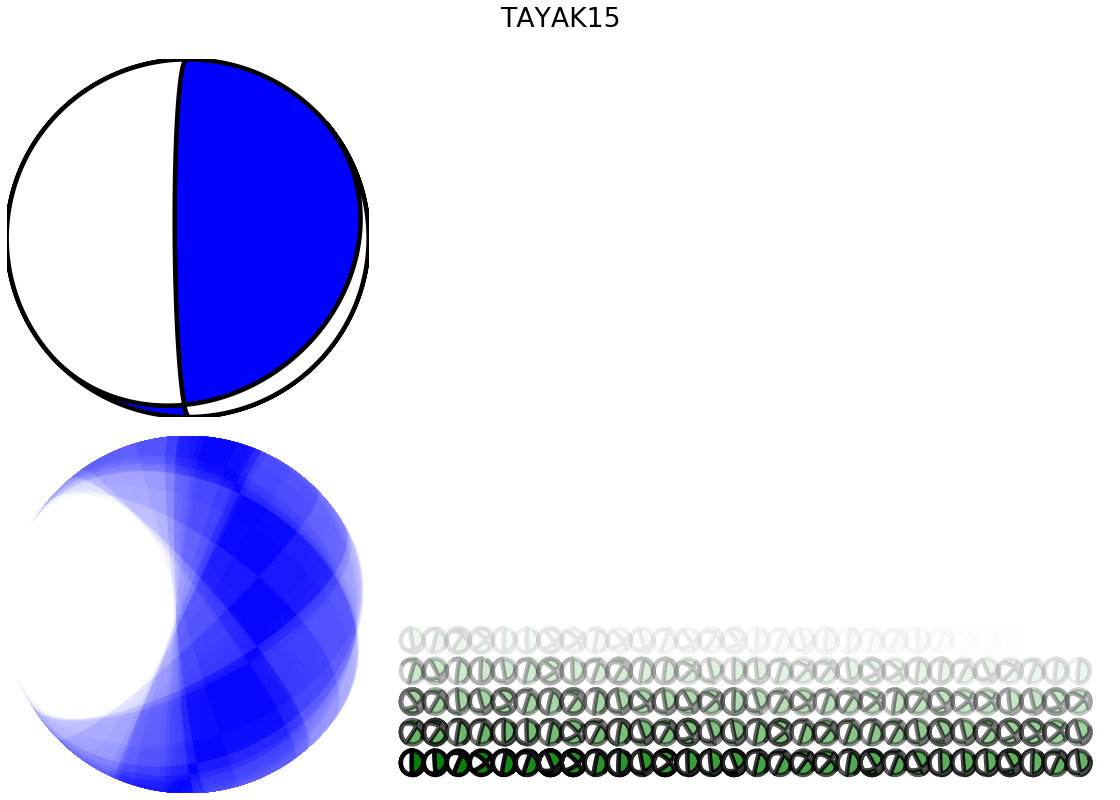

<IPython.core.display.Javascript object>


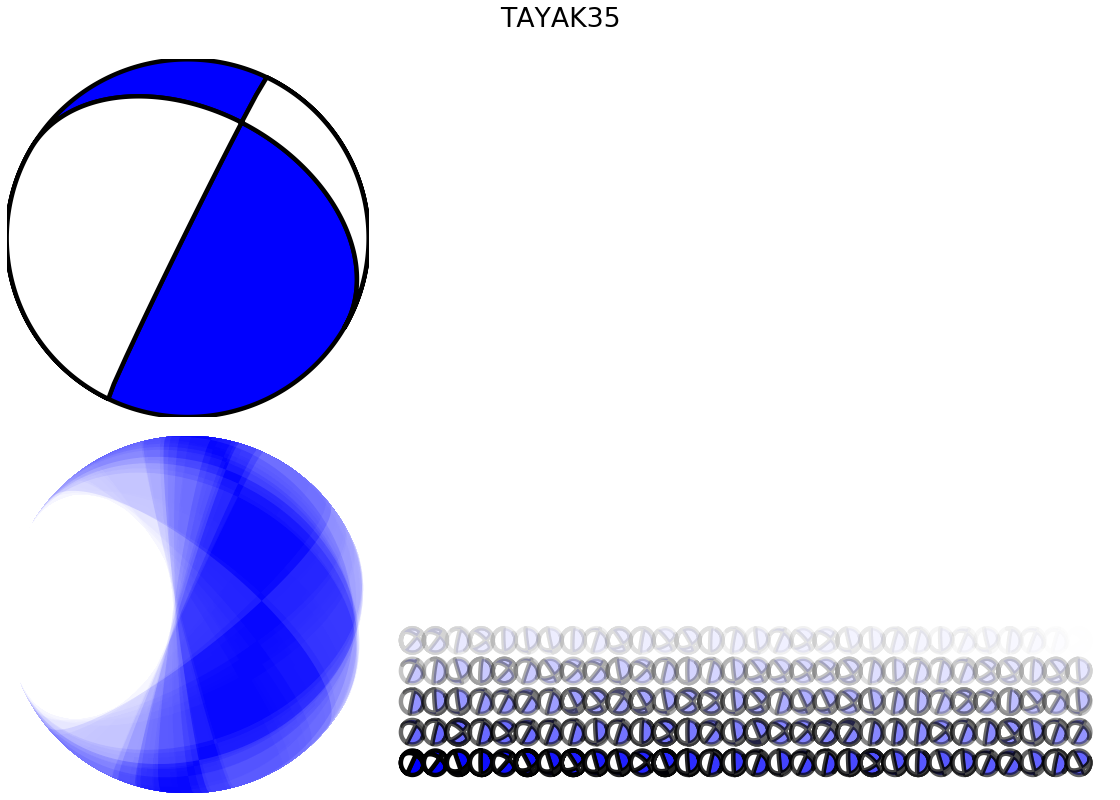

<IPython.core.display.Javascript object>


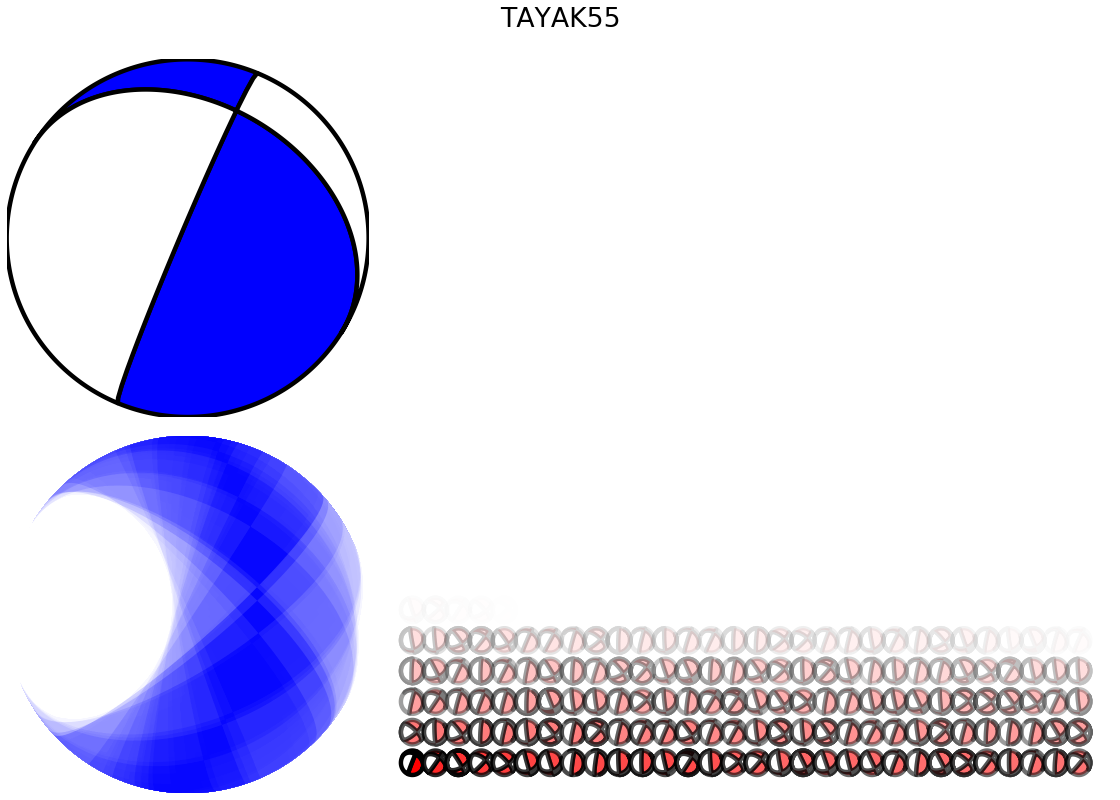

In [7]:
for data in [df173a]:
    triplot(data,30)